<a href="https://colab.research.google.com/github/Tapanmittal13/Data_Science/blob/master/Assignment_5_Image_Normalization_L2_Regularization_25_misclassified_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Took 4th code from assignment 4 and ran for 40 epcohs as mentioned this assignment
1. Did Image normalisation-it doesnt seem to change anything since its MNIST dataset.
2. Added L2 regularisation and Relu after Batch Normalisation.
3. Saved the best model and used the saved model to do prediction on test data.
4. Sorted misclassfied images in test dataset.

# **Import Libraries and modules**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


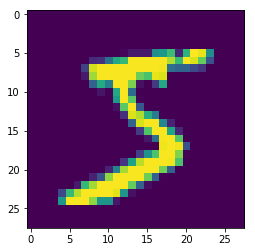

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.regularizers import l2

kernel_regularizer = l2(0.0001)
model = Sequential()

#Transition block
model.add(Convolution2D(10,3,kernel_regularizer=kernel_regularizer, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))

#Convolution block
model.add(Convolution2D(10,3,kernel_regularizer=kernel_regularizer)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3,kernel_regularizer=kernel_regularizer)) #22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

#Transition block
model.add(MaxPooling2D(2,2)) #11
model.add(Convolution2D(10,1,kernel_regularizer=kernel_regularizer)) #11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

#Convolution block
model.add(Convolution2D(10,3,kernel_regularizer=kernel_regularizer)) #9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(20, 3,kernel_regularizer=kernel_regularizer)) #7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

#Transition block

model.add(Convolution2D(10,1,kernel_regularizer=kernel_regularizer)) #7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10,7,kernel_regularizer=kernel_regularizer))
model.add(BatchNormalization()) #check this normalozation

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 10)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 10)        0         
__________

**Code below helps to take the best epoch amongst all and then evaluate the model based on it.**

**This part of code holds the best epoch in the memory rather than saving it**

In [0]:
# import numpy as np
# from keras.callbacks import Callback
# class GetBest(Callback):
#     """Get the best model at the end of training.
# 	# Arguments
#         monitor: quantity to monitor.
#         verbose: verbosity mode, 0 or 1.
#         mode: one of {auto, min, max}.
#             The decision
#             to overwrite the current stored weights is made
#             based on either the maximization or the
#             minimization of the monitored quantity. For `val_acc`,
#             this should be `max`, for `val_loss` this should
#             be `min`, etc. In `auto` mode, the direction is
#             automatically inferred from the name of the monitored quantity.
#         period: Interval (number of epochs) between checkpoints.
# 	# Example
# 		callbacks = [GetBest(monitor='val_acc', verbose=1, mode='max')]
# 		mode.fit(X, y, validation_data=(X_eval, Y_eval),
#                  callbacks=callbacks)
#     """

#     def __init__(self, monitor='val_loss', verbose=0,
#                  mode='auto', period=1):
#         super(GetBest, self).__init__()
#         self.monitor = monitor
#         self.verbose = verbose
#         self.period = period
#         self.best_epochs = 0
#         self.epochs_since_last_save = 0

#         if mode not in ['auto', 'min', 'max']:
#             warnings.warn('GetBest mode %s is unknown, '
#                           'fallback to auto mode.' % (mode),
#                           RuntimeWarning)
#             mode = 'auto'

#         if mode == 'min':
#             self.monitor_op = np.less
#             self.best = np.Inf
#         elif mode == 'max':
#             self.monitor_op = np.greater
#             self.best = -np.Inf
#         else:
#             if 'acc' in self.monitor or self.monitor.startswith('fmeasure'):
#                 self.monitor_op = np.greater
#                 self.best = -np.Inf
#             else:
#                 self.monitor_op = np.less
#                 self.best = np.Inf
                
#     def on_train_begin(self, logs=None):
#         self.best_weights = self.model.get_weights()

#     def on_epoch_end(self, epoch, logs=None):
#         logs = logs or {}
#         self.epochs_since_last_save += 1
#         if self.epochs_since_last_save >= self.period:
#             self.epochs_since_last_save = 0
#             #filepath = self.filepath.format(epoch=epoch + 1, **logs)
#             current = logs.get(self.monitor)
#             if current is None:
#                 warnings.warn('Can pick best model only with %s available, '
#                               'skipping.' % (self.monitor), RuntimeWarning)
#             else:
#                 if self.monitor_op(current, self.best):
#                     if self.verbose > 0:
#                         print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
#                               ' storing weights.'
#                               % (epoch + 1, self.monitor, self.best,
#                                  current))
#                     self.best = current
#                     self.best_epochs = epoch + 1
#                     self.best_weights = self.model.get_weights()
#                 else:
#                     if self.verbose > 0:
#                         print('\nEpoch %05d: %s did not improve' %
#                               (epoch + 1, self.monitor))            
                    
#     def on_train_end(self, logs=None):
#         if self.verbose > 0:
#             print('Using epoch %05d with %s: %0.5f' % (self.best_epochs, self.monitor,
#                                                        self.best))
#         self.model.set_weights(self.best_weights)

In [0]:
# model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

In [0]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="/content/gdrive/My Drive/Colab Notebooks/model1.hdf5", verbose=1, save_best_only=True, monitor="val_acc")

In [0]:
#callbacks = [GetBest(monitor='val_acc', verbose=1, mode='max'),LearningRateScheduler(scheduler, verbose=1)]
callbacks = [checkpointer,LearningRateScheduler(scheduler, verbose=1)]

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
testgen=ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [0]:
#Optional
datagen.fit(X_train)
testgen.fit(X_test)

In [0]:
train_generator =datagen.flow(X_train, Y_train, batch_size=128)
test_generator=testgen.flow(X_test, Y_test,batch_size=128)

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=len(X_train)//128, epochs =40 ,validation_data=test_generator,validation_steps=len(X_test)//128,callbacks=callbacks,verbose=1)

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 10s 22ms/step - loss: 0.4021 - acc: 0.9324 - val_loss: 0.1577 - val_acc: 0.9755

Epoch 00001: val_acc improved from -inf to 0.97546, saving model to /content/gdrive/My Drive/Colab Notebooks/model1.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 8s 16ms/step - loss: 0.1384 - acc: 0.9774 - val_loss: 0.0884 - val_acc: 0.9851

Epoch 00002: val_acc improved from 0.97546 to 0.98511, saving model to /content/gdrive/My Drive/Colab Notebooks/model1.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 8s 16ms/step - loss: 0.0994 - acc: 0.9823 - val_loss: 0.0792 - val_acc: 0.9856

Epoch 00003: val_acc improved from 0.98511 to 0.98562, saving model to /content/gdrive/My Drive/Colab Notebooks/model1.hdf5
Epoch 4/40

In [0]:
# load the model after 16 hours
from keras.models import load_model
saved_model = load_model("/content/gdrive/My Drive/Colab Notebooks/model1.hdf5")

In [0]:
#Prediction
# pred=saved_model.predict_generator(test_generator, steps= np.ceil(10000/256), verbose=1)
# predicted_class_indices=np.argmax(pred,axis=1)


In [0]:
#df1=pd.DataFrame(predicted_class_indices,columns="Pred")

In [0]:
# pd1.shape

In [0]:
# len(predicted_class_indices)

In [0]:
# Predicted class indices of 1st 10 val images
# predicted_class_indices[:10]

In [0]:
# True class indices of 1st 10 val images
# test_generator.y[:10]

In [0]:
# d=y_test

In [0]:
# df = pd.DataFrame(data=d,columns="true")

In [0]:
# df.shape

In [0]:
#  from sklearn.metrics import classification_report
# print(classification_report(y_test, predicted_class_indices))

In [0]:
# import pandas as pd
# d = {'pred': model.predict_generator(test_generator, steps=np.ceil(10000/256), verbose=1), 'true': np.argmax(y_test,axis=1)} #axis=1!important!
# df = pd.DataFrame(data=d)

# #looking at wrong predicted values(For 1! you can change it.)
# #array1 = np.array(df[(df.pred != df.true) & (df.true==1)].index)
# #print(array1)

# # shows total mistakes
# df2 = df[(df.pred != df.true)]
# df2

# df2.shape

In [0]:
iterator = datagen.flow(X_test, Y_test, batch_size=1024, shuffle=False)
predictions = saved_model.predict_generator(iterator,steps=len(iterator))

In [0]:
print(predictions)
len(predictions[1])

[[1.5611633e-05 3.3720869e-05 3.2331443e-06 ... 9.9988186e-01
  5.0048516e-06 2.7240246e-06]
 [2.1504968e-05 4.4949000e-05 9.9972361e-01 ... 6.0321290e-06
  1.5878521e-06 1.1852381e-06]
 [2.7455044e-05 9.9961722e-01 1.1690391e-05 ... 7.0553404e-05
  1.4089716e-05 2.7454522e-05]
 ...
 [2.9236001e-06 4.1120675e-06 1.4580637e-06 ... 4.4161675e-06
  3.0730307e-06 3.7008942e-06]
 [8.6329230e-05 2.3143830e-06 5.1249576e-06 ... 1.2960641e-06
  1.2321958e-04 2.3217677e-05]
 [1.8618886e-05 8.6502332e-06 1.3846777e-04 ... 2.5013198e-05
  3.1706273e-05 3.5292800e-05]]


10

In [0]:
def get_mnist_labels():
    return list(range(0, 10))

**Code to get misclassified Images**

In [0]:
def show_misclassified(X, Y_ohe, Y_pred, classes,
                       columns=5, total=25,
                       pick_randomly=True, image_size_multiplier=4):
    y_true = np.argmax(Y_ohe, axis=1)
    print("True Value",y_true)
    yp = np.argmax(Y_pred, axis=1)
    print("predicted Values",yp)
    a=list(y_true)
    b=list(yp)
    counter=0
    for i in range(len(y_true)):
      if(a[i] != b[i]):
        counter=counter+1
    print("No of Misclassified Images from test dataset",counter)
    misclassified = y_true != yp
    
    X = X[misclassified]
    Y_ohe = Y_ohe[misclassified]
    Y_pred = Y_pred[misclassified]
    y_true = y_true[misclassified]
    yp = yp[misclassified]
    total = min(total, len(X))
    rows = int(np.ceil(total / columns))

    indexes = np.random.choice(len(X), total, replace=False) if pick_randomly else list(range(0, total))

    X = np.take(X, indexes, axis=0)
    Y_ohe = np.take(Y_ohe, indexes, axis=0)
    Y_pred = np.take(Y_pred, indexes, axis=0)
    y_true = np.take(y_true, indexes, axis=0)
    yp = np.take(yp, indexes, axis=0)

    fig_height = rows * image_size_multiplier * 2
    fig_width = columns * image_size_multiplier

    fig = plt.figure(figsize=(fig_width, fig_height))
    idx1 = 0
    idx2 = 0
    jdx = 0
    for row in range(rows):
        for column in range(columns):
            if idx1 >= len(X):
                break
            img = X[idx1]
            assert (len(img.shape) == 3 and img.shape[2] in [1, 3, 4]) or len(img.shape) == 2
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            cmap = None
            if (len(img.shape) == 3 and img.shape[2] == 1) or len(img.shape) == 2:
                cmap = "binary"
            if len(img.shape) == 3 and img.shape[2] == 1:
                img = img.reshape((img.shape[0], img.shape[1]))
            ax.imshow(img, cmap=cmap)
            ax.set_title("Predicted = %s, Actual = %s" % (classes[yp[idx1]], classes[y_true[idx1]]))
            idx1 += 1
            jdx += 1

#         for column in range(columns):
#             if idx2 >= len(Y_pred):
#                 break
#             yps = Y_pred[idx2]
#             ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
#             ind = np.arange(len(classes))
#             rects = ax.bar(ind, yps, 0.25, label='Labels')
#             ax.set_ylabel('Probability')
#             ax.set_yticks(np.arange(0, 1.2, 0.2))
#             ax.set_title('Probability vs Labels')
#             ax.set_xticks(ind)
#             ax.set_xticklabels(classes)
#             ax.legend()
#             idx2 += 1
#             jdx += 1
    plt.show()

True Value [7 2 1 ... 4 5 6]
predicted Values [7 2 1 ... 4 5 6]
No of Misclassified Images from test dataset 57


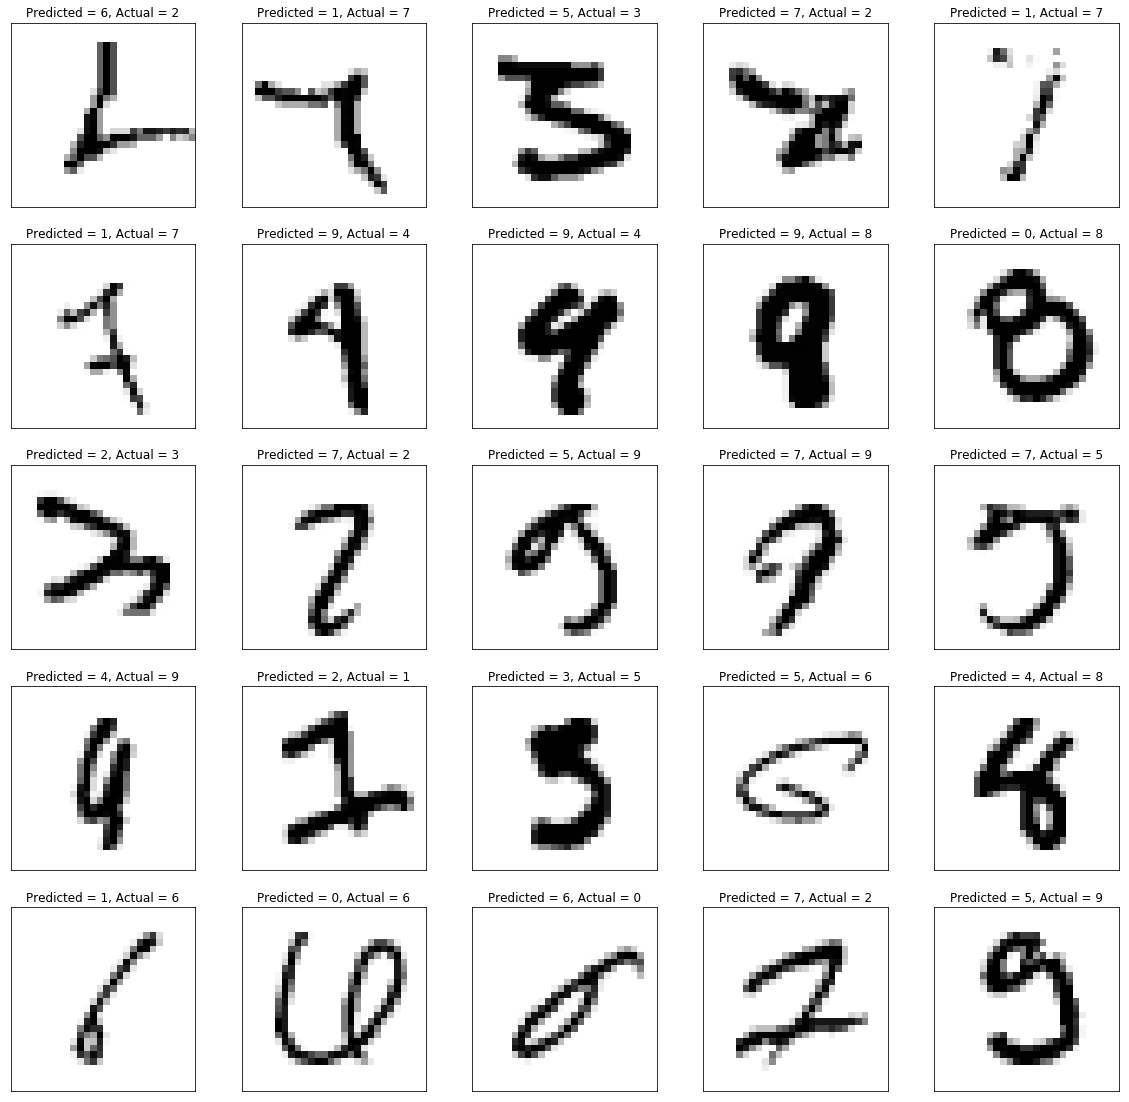

In [0]:
show_misclassified(X_test, Y_test, predictions[:len(Y_test)], classes=get_mnist_labels(), 
                       columns=5, total=25, 
                       pick_randomly=True, image_size_multiplier=4)